In [1]:
# Import modules
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

today = dt.date.today()
this_month = pd.to_datetime(str(today.year)+'-'+str(today.month)+'-01')
%qtconsole

In [2]:
# Define local directories
master_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\'
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\processed\\'
data_external_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\rig-count_L48\\data\\external\\'

In [3]:
# Load csv into df
df = pd.read_csv(data_interim_dir + 'merged_data_weekly_class.csv',parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Remove basin rig counts
df = df.iloc[:,5:]

# Filter values for only past months
df = df[df.index < this_month]
df = df.reset_index()
df.head()

,date,Total US RigCount,wti_spot_lag_15,wti_spot_lag_9,wti_spot,brent_spot,wti_fut_1,wti_fut_2,wti_fut_3,wti_fut_4,...,oecd_cons_smooth,oecd_cons,non-oecd_cons_smooth,non-oecd_cons,world_cons_smooth,world_cons,rig_change_4bin_week+4,rig_change_4bin_week+8,rig_pct_change_week+4,rig_pct_change_week+8
0,2020-10-30,221.0,41.338,42.932,37.316,37.906,37.496,37.828,38.184,38.536,...,42.932,44.081196,42.932,52.709667,42.932,96.790863,NaN,NaN,NaN,NaN
1,2020-10-23,211.0,40.570,42.726,40.426,40.998,40.562,40.832,41.120,41.400,...,42.726,44.049174,42.726,52.522949,42.726,96.572123,NaN,NaN,NaN,NaN
2,2020-10-16,205.0,40.442,42.076,40.330,41.320,40.502,40.784,41.118,41.434,...,42.076,44.017152,42.076,52.336232,42.076,96.353384,NaN,NaN,NaN,NaN
3,2020-10-09,193.0,39.992,41.568,40.188,41.060,40.326,40.608,40.966,41.314,...,41.568,43.985129,41.568,52.149515,41.568,96.134644,NaN,NaN,NaN,NaN
4,2020-10-02,189.0,39.220,40.686,38.992,39.994,39.176,39.450,39.794,40.154,...,40.686,43.953107,40.686,51.962797,40.686,95.915904,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Total US RigCount,wti_spot_lag_15,wti_spot_lag_9,wti_spot,brent_spot,wti_fut_1,wti_fut_2,wti_fut_3,wti_fut_4,usa_net_import_smooth,...,opec_surp_capac,non-opec_tot_prod,oecd_cons_smooth,oecd_cons,non-oecd_cons_smooth,non-oecd_cons,world_cons_smooth,world_cons,rig_pct_change_week+4,rig_pct_change_week+8
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,502.000000,502.000000
mean,917.567780,69.939861,69.530452,68.656629,76.115823,68.708739,69.053763,69.287403,69.441648,6.674864,...,2.334294,60.427686,69.530452,46.304491,69.530452,48.949088,69.530452,95.253579,-0.008480,-0.011929
std,395.831087,23.805338,23.923285,24.099878,28.749426,24.036628,23.667002,23.357961,23.086148,1.824756,...,1.433033,3.705302,23.923285,1.878435,23.923285,3.385193,23.923285,4.347424,0.072178,0.125091
min,172.000000,3.324000,3.324000,3.324000,14.236000,3.920000,19.070000,22.670000,24.834000,1.997500,...,0.798167,54.124040,3.324000,35.126337,3.324000,41.998207,3.324000,81.065915,-0.421708,-0.620192
25%,663.000000,50.184000,49.244000,48.774000,51.964000,48.910000,49.582000,49.936000,50.246000,5.988250,...,1.651613,57.427698,49.244000,45.842000,49.244000,46.131794,49.244000,91.885476,-0.019848,-0.033334
50%,833.000000,63.074000,62.070000,61.136000,67.248000,61.114000,61.048000,61.034000,60.946000,7.201750,...,2.038157,60.908831,62.070000,46.565669,62.070000,49.310561,62.070000,95.269843,0.003500,0.009174
75%,1354.000000,93.702000,93.702000,93.702000,108.270000,93.730000,93.810000,94.206000,94.544000,7.766000,...,2.521458,62.638801,93.702000,47.399222,93.702000,51.898536,93.702000,99.111101,0.026793,0.054922
max,1609.000000,112.296000,112.296000,112.296000,126.624000,112.808000,113.302000,113.578000,113.692000,9.474250,...,9.087111,67.705728,112.296000,48.923817,112.296000,54.785057,112.296000,102.660965,0.132184,0.255556


In [5]:
num_col_rig_change = df.columns.str.contains('rig_').sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    509 non-null    datetime64[ns]
 1   Total US RigCount       509 non-null    float64       
 2   wti_spot_lag_15         509 non-null    float64       
 3   wti_spot_lag_9          509 non-null    float64       
 4   wti_spot                509 non-null    float64       
 5   brent_spot              509 non-null    float64       
 6   wti_fut_1               509 non-null    float64       
 7   wti_fut_2               509 non-null    float64       
 8   wti_fut_3               509 non-null    float64       
 9   wti_fut_4               509 non-null    float64       
 10  usa_net_import_smooth   509 non-null    float64       
 11  usa_net_import          509 non-null    float64       
 12  usa_stocks_all          509 non-null    float64   

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 7 to 508
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    502 non-null    datetime64[ns]
 1   Total US RigCount       502 non-null    float64       
 2   wti_spot_lag_15         502 non-null    float64       
 3   wti_spot_lag_9          502 non-null    float64       
 4   wti_spot                502 non-null    float64       
 5   brent_spot              502 non-null    float64       
 6   wti_fut_1               502 non-null    float64       
 7   wti_fut_2               502 non-null    float64       
 8   wti_fut_3               502 non-null    float64       
 9   wti_fut_4               502 non-null    float64       
 10  usa_net_import_smooth   502 non-null    float64       
 11  usa_net_import          502 non-null    float64       
 12  usa_stocks_all          502 non-null    float64   

Looks good! Let's get started.

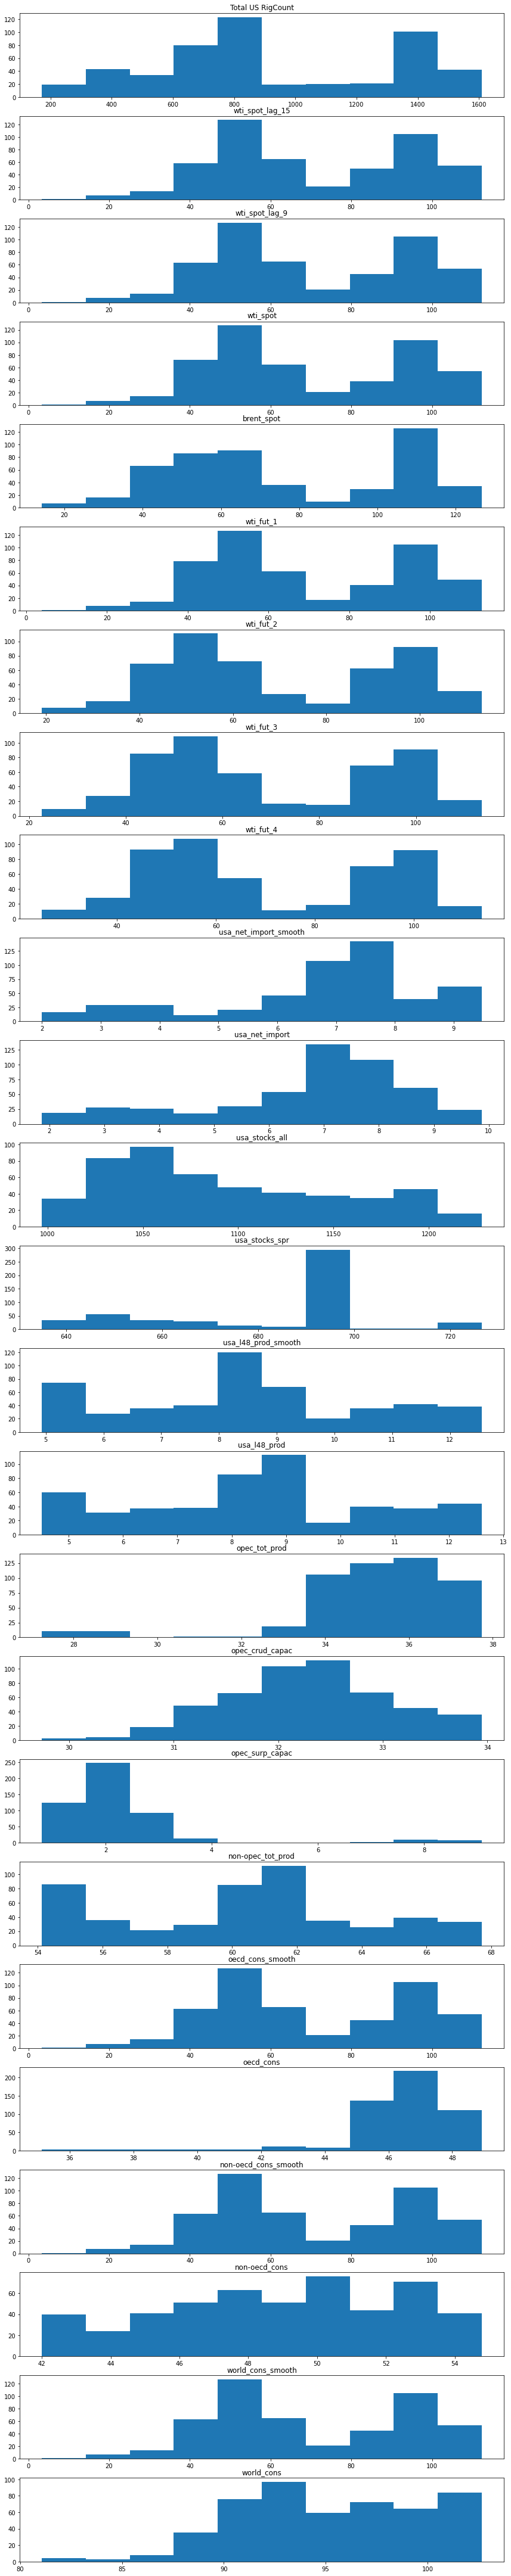

In [7]:
fig, ax = plt.subplots(len(df.columns)-1-num_col_rig_change,figsize=(12,60))
fig.tight_layout()
for i in range(1,len(df.columns)-num_col_rig_change):
    ax[i-1].hist(df.iloc[:,i])
    ax[i-1].set(title=df.columns[i])

## Train / Test Split
Define features X, and target variable y

In [8]:
X = df.iloc[:,2:]
y = df.iloc[:,-int(num_col_rig_change/2):]

Train / test split will be done using sklearn's train_test_split. Depending on what future week that will be tested, will need to index y appropriately.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y.iloc[:,1],test_size=0.33)

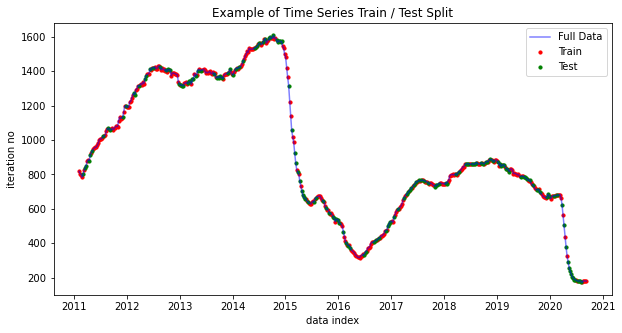

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.date,df['Total US RigCount'],c='b',alpha=0.5,label='Full Data')
ax.scatter(df.date[y_train.sort_index().index],df['Total US RigCount'][y_train.sort_index().index],c='r',alpha=1,s=10,label='Train')
ax.scatter(df.date[y_test.sort_index().index],df['Total US RigCount'][y_test.sort_index().index], c='g',alpha=1,s=10,label='Test')
      
ax.set(title='Example of Time Series Train / Test Split',xlabel='data index',ylabel='iteration no')
ax.legend()

In [11]:
# Save preprocessed file as CSV
df.to_csv(data_processed_dir+'processed_data_weekly_class.csv',index=False)